# CS182_HW4_Coding.pdf is the instruction of this part.

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# MNIST data

In [2]:
data_filename = 'data/images.mat'
data = scipy.io.loadmat(data_filename)
data = data['train_images']

## Q1

In [10]:
import random
from tqdm import tqdm

Ks = [5, 10, 20]
cluster_res = {}

def KMeans(data, k, max_iter=20, stop_threshold=0.01):
    centers = [data[:, :, np.random.randint(0, data.shape[2])] for _ in range(k)]
    for _ in tqdm(range(max_iter)):
        clusters = [[] for _ in range(k)]
        for i in range(data.shape[2]):
            distances = [np.linalg.norm(data[:, :, i] - center) for center in centers]
            clusters[np.argmin(distances)].append(data[:, :, i])
        centers = [np.mean(cluster, axis=0) for cluster in clusters]
        if np.mean([np.linalg.norm(centers[i] - centers[i-1]) for i in range(1, k)]) < stop_threshold:
            break
    return centers

In [11]:
cluster_res[5] = KMeans(data, 5)

100%|██████████| 20/20 [00:32<00:00,  1.64s/it]


In [12]:
cluster_res[10] = KMeans(data, 10)

100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


In [13]:
cluster_res[20] = KMeans(data, 20)

100%|██████████| 20/20 [01:51<00:00,  5.58s/it]


## Q2

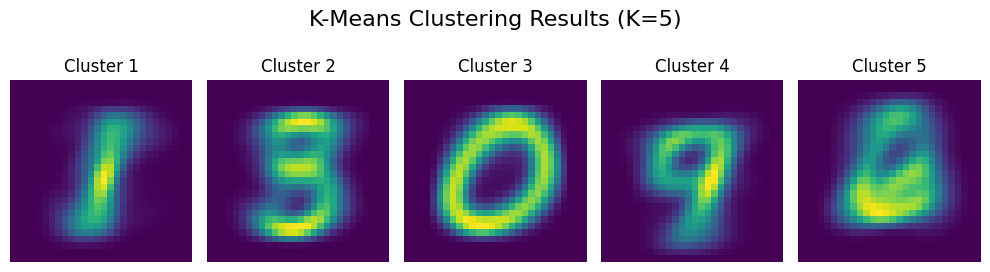

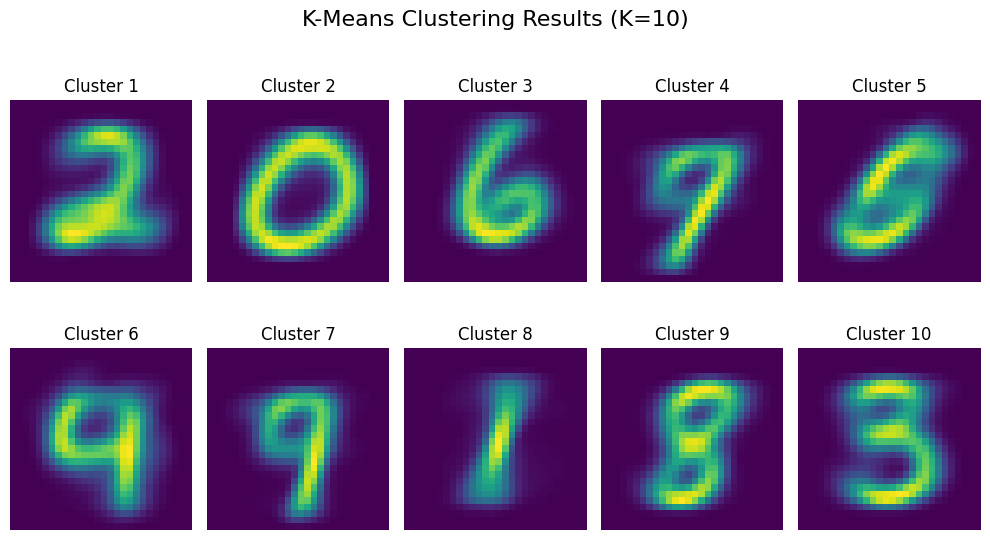

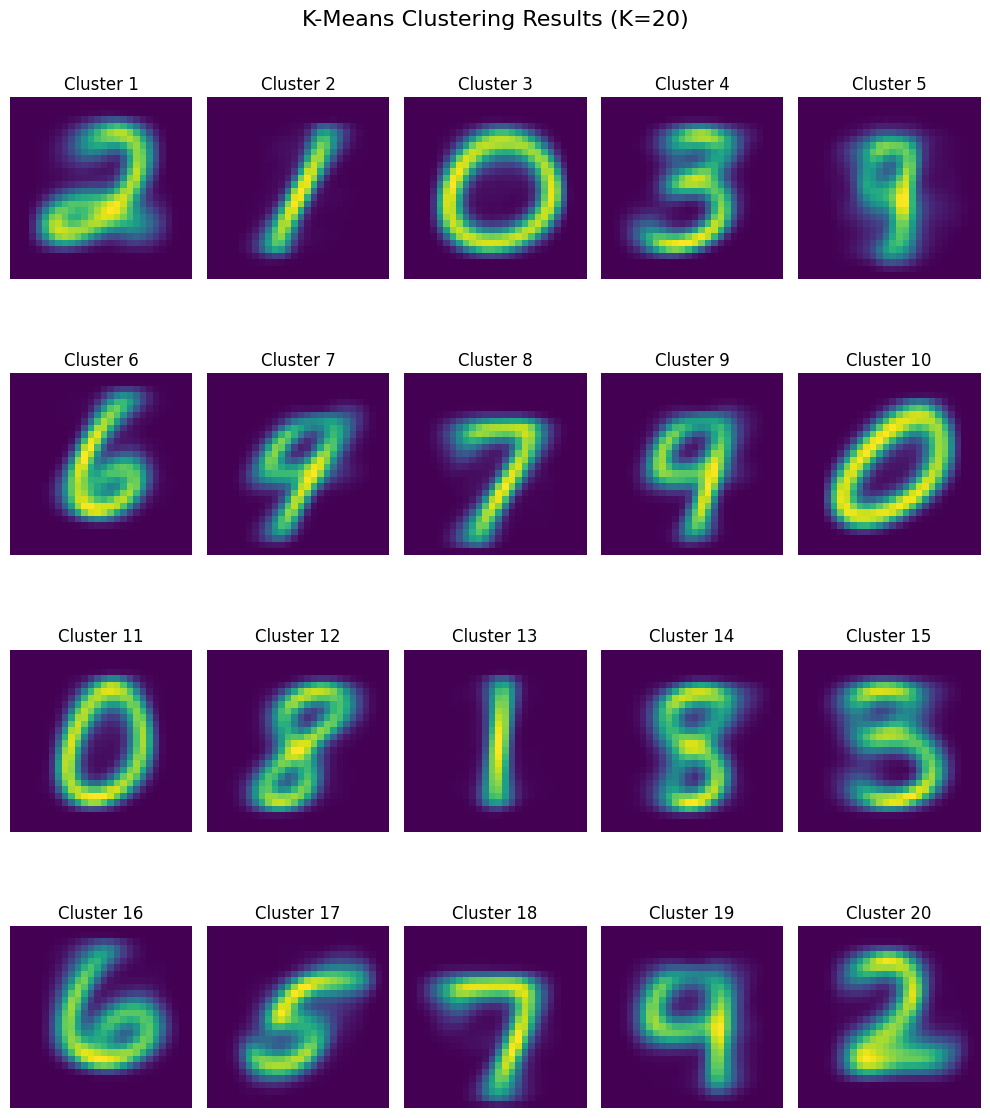

In [27]:
def plot_cluster_centers(centers, k, nrows, ncols, figsize):
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.ravel()
    for i, c in enumerate(centers):
        axs[i].imshow(c)
        axs[i].set_title(f'Cluster {i+1}')
        axs[i].axis('off')
        axs[i].set_aspect('equal')
    for j in range(i+1, nrows*ncols):
        axs[j].axis('off')
    plt.suptitle(f'K-Means Clustering Results (K={k})', fontsize=16)
    plt.tight_layout()
    plt.show()
    
# k = 5
plot_cluster_centers(cluster_res[5], 5, 1, 5, (10, 3))
# k = 10
plot_cluster_centers(cluster_res[10], 10, 2, 5, (10, 6))
# k = 20
plot_cluster_centers(cluster_res[20], 20, 4, 5, (10, 12))

### Q2 Differences between results with different numbers of cluster centers

As the result show above, with the number of cluster centers increasing, each cluster center will contains less data, which makes the result much more detailed, thus can differ data into more complex and detailed type. Meanwhile, higher cluster center number also has the problem of overfitting, so the number of cluster centers should be chosen according to the apply situation. 